In [42]:

# Package imports# Packa 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

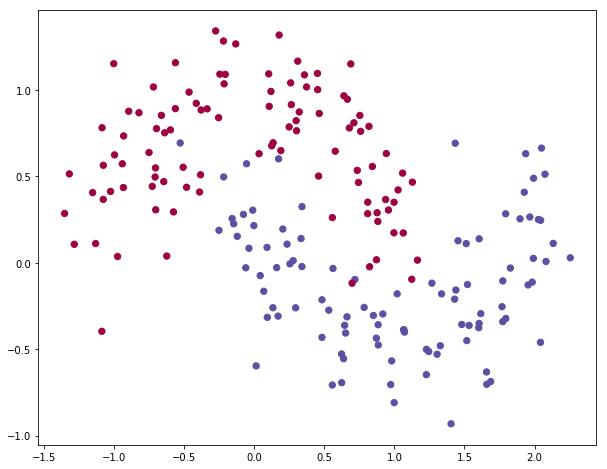

In [43]:

# Generate a dataset and plot it# Gener 
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [44]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [45]:

# Helper function to plot a decision boundary.# Helpe 
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

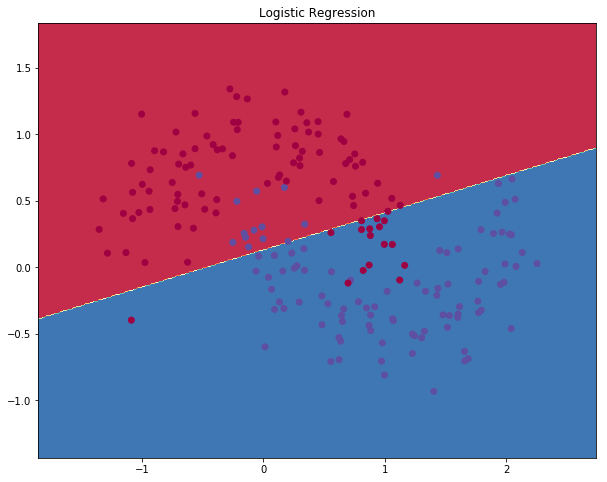

In [46]:

# Plot the decision boundary# Plot t 
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [47]:
class Loss:
    def __init__(self, model, X, reg_lambda):
        self.model= model
        self.X= X
        self.num_examples=len(X)
        self.reg_lambda=reg_lambda
    
    def calculate_loss(self):
        W1, b1, W2, b2 = self.model['W1'], self.model['b1'], self.model['W2'], self.model['b2']
        # Forward propagation to calculate our predictions
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # Calculating the loss
        corect_logprobs = -np.log(probs[range(self.num_examples), y])
        data_loss = np.sum(corect_logprobs)
        # Add regulatization term to loss (optional)
        data_loss += self.reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
        return 1./self.num_examples * data_loss

class Modele:
    
    def __init__(self, nn_hdim, X, y):
        self.y= y
        self.nn_hdim=nn_hdim  
        self.num_passes= 20000
        self.print_loss= False
        self.X=X
        self.num_examples = len(X) # training set size
        self.nn_input_dim = 2 # input layer dimensionality
        self.nn_output_dim = 2 # output layer dimensionality

        # Gradient descent parameters (I picked these by hand)
        self.epsilon = 0.01 # learning rate for gradient descent
        self.reg_lambda = 0.01 # regularization strength
        
        self.W1 = np.random.randn(self.nn_input_dim, nn_hdim) / np.sqrt(self.nn_input_dim)
        self.b1 = np.zeros((1, nn_hdim))
        self.W2 = np.random.randn(nn_hdim, self.nn_output_dim) / np.sqrt(nn_hdim)
        self.b2 = np.zeros((1, self.nn_output_dim))
        
        self.model= {}
        

        # Helper function to predict an output (0 or 1)
    def predict(self, model, x):
        W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
        # Forward propagation
        z1 = x.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)
        
    def feedForward(self):
        # Forward propagation
        z1 = self.X.dot(self.W1) + self.b1
        a1 = np.tanh(z1)
        z2 = a1.dot(self.W2) + self.b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return z1, a1, z2, exp_scores, probs
    
    def backpropagation(self, probs, a1):
        # Backpropagation
        delta3 = probs
        delta3[range(self.num_examples), self.y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(self.W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(self.X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += self.reg_lambda * self.W2
        dW1 += self.reg_lambda * self.W1
        return dW2, db2, dW1, db1
    
    def gradientDescente(self, dW2, db2, dW1, db1):
        
        # Gradient descent parameter update
        self.W1 += -self.epsilon * dW1
        self.b1 += -self.epsilon * db1
        self.W2 += -self.epsilon * dW2
        self.b2 += -self.epsilon * db2
    
    def build(self, i, print_loss ):
        # Assign new parameters to the model
        model = { 'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2}

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        loss= Loss(model,self.X, self.reg_lambda)
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, loss.calculate_loss()))
            
        return model
        
        
    
    def build_model(self,  print_loss=False):
    
        # Initialize the parameters to random values. We need to learn these.
        
        #np.random.seed(0)
     

        # This is what we return at the end
       # model = {}

        # Gradient descent. For each batch...
        for i in range(0, self.num_passes):

            # Forward propagation
            z1 = self.X.dot(self.W1) + self.b1
            a1 = np.tanh(z1)
            z2 = a1.dot(self.W2) + self.b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

            # Backpropagation
            delta3 = probs
            delta3[range(self.num_examples), self.y] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(self.W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(self.X.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += self.reg_lambda * self.W2
            dW1 += self.reg_lambda * self.W1

            # Gradient descent parameter update
            self.W1 += -self.epsilon * dW1
            self.b1 += -self.epsilon * db1
            self.W2 += -self.epsilon * dW2
            self.b2 += -self.epsilon * db2

            # Assign new parameters to the model
            model = { 'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2}

            # Optionally print the loss.
            # This is expensive because it uses the whole dataset, so we don't want to do it too often.
            loss= Loss(model,self.X, self.reg_lambda)
            if print_loss and i % 1000 == 0:
              print("Loss after iteration %i: %f" %(i, loss.calculate_loss()))
            
            
        

        return model


Loss after iteration 0: 0.466857
Loss after iteration 1000: 0.069353
Loss after iteration 2000: 0.070063
Loss after iteration 3000: 0.071223
Loss after iteration 4000: 0.071264
Loss after iteration 5000: 0.071287
Loss after iteration 6000: 0.071301
Loss after iteration 7000: 0.071308
Loss after iteration 8000: 0.071313
Loss after iteration 9000: 0.071315
Loss after iteration 10000: 0.071316
Loss after iteration 11000: 0.071317
Loss after iteration 12000: 0.071317
Loss after iteration 13000: 0.071317
Loss after iteration 14000: 0.071317
Loss after iteration 15000: 0.071317
Loss after iteration 16000: 0.071317
Loss after iteration 17000: 0.071317
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


Text(0.5,1,'Decision Boundary for hidden layer size 3')

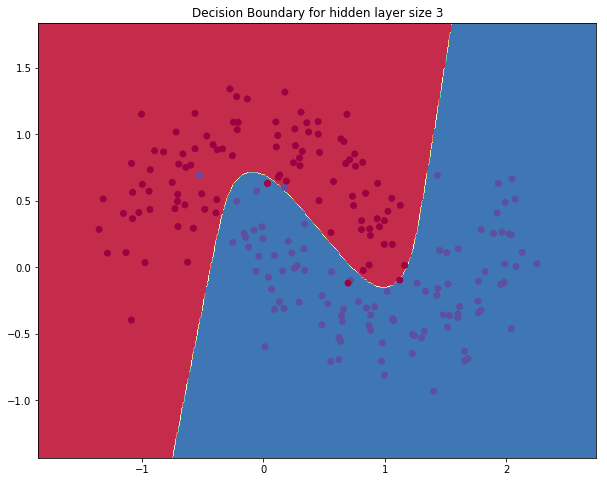

In [48]:
modele1=Modele(3, X, y) 
for i in range(0,20000):
    z1, a1, z2, exp_scores, probs= modele1.feedForward()
    dW2, db2, dW1, db1= modele1.backpropagation(probs, a1)
    modele1.gradientDescente(dW2, db2, dW1, db1)
    val= modele1.build( i, True )


# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(val, x))
plt.title("Decision Boundary for hidden layer size 3")    
    
    

Loss after iteration 0: 0.448796
Loss after iteration 1000: 0.069203
Loss after iteration 2000: 0.071185
Loss after iteration 3000: 0.071221
Loss after iteration 4000: 0.071261
Loss after iteration 5000: 0.071285
Loss after iteration 6000: 0.071299
Loss after iteration 7000: 0.071307
Loss after iteration 8000: 0.071311
Loss after iteration 9000: 0.071314
Loss after iteration 10000: 0.071315
Loss after iteration 11000: 0.071316
Loss after iteration 12000: 0.071316
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


Text(0.5,1,'Decision Boundary for hidden layer size 3')

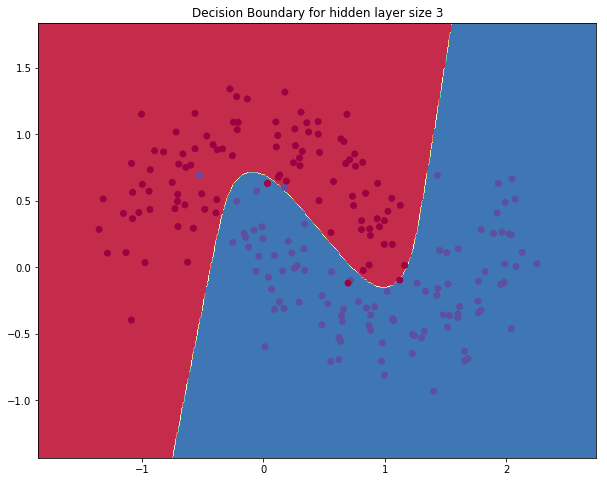

In [21]:
model = Modele(3, X, y)
vecteurs= model.build_model(  print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: model.predict(vecteurs, x))
plt.title("Decision Boundary for hidden layer size 3")